In [1]:
%matplotlib inline
import numpy as np
np.random.seed(42) # fixing the seed
import matplotlib
import matplotlib.pyplot as plt
import rampy as rp
from scipy.stats import norm
from sklearn.model_selection import train_test_split

# ML classificator class

Below is the class I am working on, to wrap the scikit-learn algorithm in a similar way compared to the regression class:

# Fake data generation

Below we generate 5 fake signals that can be measured modulo some noise. More complex examples can be generated if wanted.

Number of samples = 100
Number of labels = 100


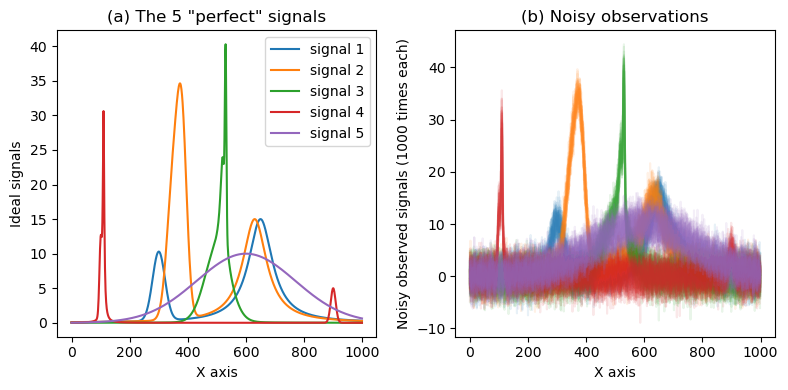

In [2]:
# The X axis
x = np.arange(0, 1000, 1.0)

# The perfect 5 signals
spectra_1 = rp.gaussian(x, 10.0, 300., 25.) + rp.lorentzian(x, 15., 650., 50.)
spectra_2 = rp.gaussian(x, 20.0, 350., 25.) + rp.gaussian(x, 25.0, 380., 20.) + rp.lorentzian(x, 15., 630., 50.)
spectra_3 = rp.gaussian(x, 10.0, 500., 50.) + rp.lorentzian(x, 15.0, 520., 10.) + rp.gaussian(x, 25., 530., 3.)
spectra_4 = rp.gaussian(x, 10.0, 100., 5.) + rp.lorentzian(x, 30.0, 110., 3.) + rp.gaussian(x, 5., 900., 10.)
spectra_5 = rp.gaussian(x, 10.0, 600., 200.)

# the number of observations of each signal
number_of_spectra = 20

# generating a dataset (will be shuffled later during the train-test split)
dataset = np.hstack((np.ones((len(x),number_of_spectra))*spectra_1.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_2.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_3.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_4.reshape(-1,1),
                     np.ones((len(x),number_of_spectra))*spectra_5.reshape(-1,1)
                    )).T

# add noise
noise_scale = 2.0
dataset = dataset + np.random.normal(scale=noise_scale,size=(len(dataset),len(x)))

# create numeric labels
labels =  np.vstack((np.tile(np.array([1]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([2]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([3]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([4]).reshape(-1,1),number_of_spectra),
                     np.tile(np.array([5]).reshape(-1,1),number_of_spectra),
                    )).reshape(-1,1)

print('Number of samples = {}'.format(dataset.shape[0]))
print('Number of labels = {}'.format(labels.shape[0]))

# Do figure
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('(a) The 5 "perfect" signals')
plt.plot(x, spectra_1, label='signal 1')
plt.plot(x, spectra_2, label='signal 2')
plt.plot(x, spectra_3, label='signal 3')
plt.plot(x, spectra_4, label='signal 4')
plt.plot(x, spectra_5, label='signal 5')
plt.xlabel('X axis')
plt.ylabel('Ideal signals')
plt.legend()

plt.subplot(1,2,2)
plt.title('(b) Noisy observations')
plt.plot(x, dataset[0*number_of_spectra:1*number_of_spectra,:].T, color="C0",alpha=0.1)
plt.plot(x, dataset[1*number_of_spectra:2*number_of_spectra,:].T, color="C1",alpha=0.1)
plt.plot(x, dataset[2*number_of_spectra:3*number_of_spectra,:].T, color="C2",alpha=0.1)
plt.plot(x, dataset[3*number_of_spectra:4*number_of_spectra,:].T, color="C3",alpha=0.1)
plt.plot(x, dataset[4*number_of_spectra:5*number_of_spectra,:].T, color="C4",alpha=0.1)

plt.xlabel('X axis')
plt.ylabel('Noisy observed signals (1000 times each)')

plt.tight_layout()

# Machine Learning example of treatment

This is using directly the scikit-learn functions

Note that we do the train-test split here, but mlclassificator can do it too.

In [3]:
X = dataset
y = labels

# shufling
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

#
# TRain/Test split
#

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# ML classification with rampy

This does the exact same thing as above, using the rampy class.

In [4]:
# initiate model
MLC = rp.mlclassificator(X,y,scaling=False,test_size=0.33)

# The algorithms
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]


# iterate over classifiers
for name in names:
    MLC.algorithm = name
    MLC.fit()
    score = MLC.model.score(MLC.X_test, MLC.y_test)
    print('\n- Classifier:'+name+' is scoring (test:) '+str(score)+'.')


- Classifier:Nearest Neighbors is scoring (test:) 1.0.

- Classifier:Linear SVM is scoring (test:) 1.0.

- Classifier:RBF SVM is scoring (test:) 0.09090909090909091.

- Classifier:Gaussian Process is scoring (test:) 0.09090909090909091.

- Classifier:Decision Tree is scoring (test:) 0.8787878787878788.

- Classifier:Random Forest is scoring (test:) 0.8484848484848485.

- Classifier:Neural Net is scoring (test:) 1.0.

- Classifier:AdaBoost is scoring (test:) 1.0.

- Classifier:Naive Bayes is scoring (test:) 1.0.

- Classifier:QDA is scoring (test:) 0.5757575757575758.


/Users/charleslelosq/Sync_me/Projets/rampy/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# This is the code in sklearn

In [5]:

import sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier

#
# Initiate classifiers
#

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(max_depth=15),
    RandomForestClassifier(max_depth=15, n_estimators=5, max_features=2),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(), QuadraticDiscriminantAnalysis()]

# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train.ravel())
    score = clf.score(X_test, y_test.ravel())
    print('\n- Classifier:'+name+' is scoring '+str(score)+'.')


- Classifier:Nearest Neighbors is scoring 1.0.

- Classifier:Linear SVM is scoring 1.0.

- Classifier:RBF SVM is scoring 0.09090909090909091.

- Classifier:Gaussian Process is scoring 0.09090909090909091.

- Classifier:Decision Tree is scoring 0.8787878787878788.

- Classifier:Random Forest is scoring 1.0.

- Classifier:Neural Net is scoring 1.0.

- Classifier:AdaBoost is scoring 0.9696969696969697.

- Classifier:Naive Bayes is scoring 1.0.

- Classifier:QDA is scoring 0.5757575757575758.


/Users/charleslelosq/Sync_me/Projets/rampy/.conda/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
